In [ ]:
#import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# load dataset

In [2]:
Metadata_df = pd.read_csv('/Users/priyanka/Downloads/Zomato Restaurant names and Metadataa.csv')
Review_df = pd.read_csv('/Users/priyanka/Downloads/Zomato Restaurant reviewss.csv')

In [ ]:
#check column name 

In [4]:
Metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
#check null values

In [6]:
Review_df.isnull().sum()
Metadata_df.isnull().sum()


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Distrubution of Restaurent Ratings 

In [7]:
Review_df["Rating"] = pd.to_numeric(Review_df["Rating"], errors="coerce")
Review_df["Rating"].fillna(Review_df["Rating"].mean(), inplace=True)


In [8]:
Review_df.drop_duplicates(inplace=True)
Metadata_df.drop_duplicates(inplace=True)


In [11]:
Review_df['Rating'] = pd.to_numeric(Review_df['Rating'],
errors='coerce')

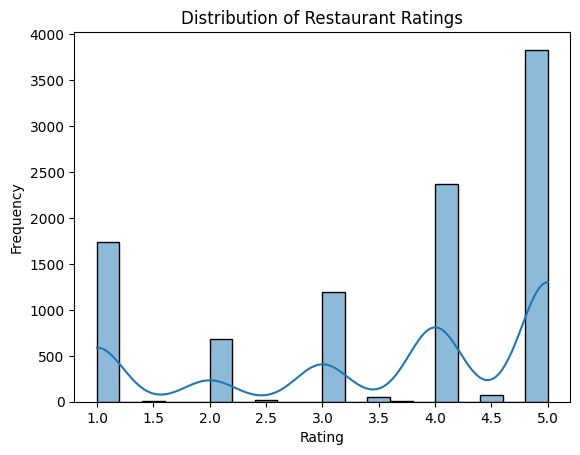

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Rating distribution
sns.histplot(Review_df['Rating'], kde=True, bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [3]:
Metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [4]:
Metadata_df = pd.read_csv('/Users/priyanka/Downloads/Zomato Restaurant names and Metadataa.csv')

In [5]:
Metadata_df.columns

Index(['Restaurant Name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Timings'],
      dtype='object')

In [8]:
Review_df = pd.read_csv('/Users/priyanka/Downloads/Zomato Restaurant reviewss.csv')


In [9]:
Review_df.columns

Index(['Restaurant Name', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [16]:
Metadata_df.columns

Index(['restaurant_name', 'links', 'cost', 'collections', 'cuisines',
       'timings'],
      dtype='object')

In [22]:
print(df.columns)


Index(['restaurant_name', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures', 'links', 'cost', 'collections', 'cuisines', 'timings'],
      dtype='object')


In [ ]:
#Top 10 Cusines

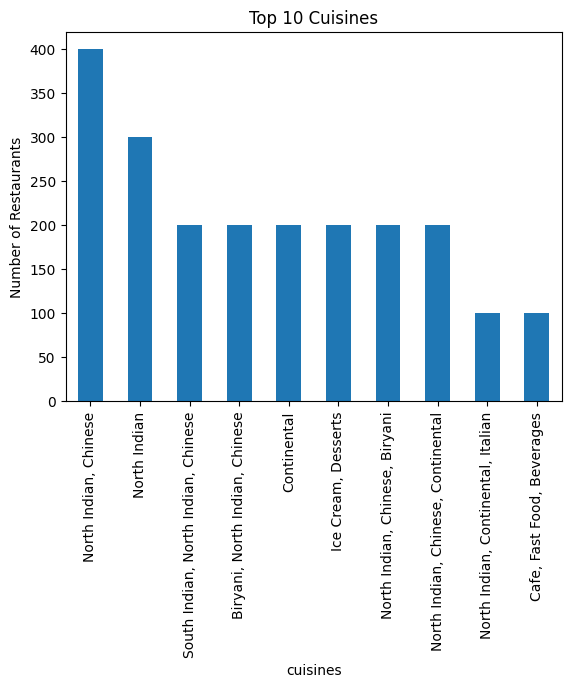

In [26]:
df["cuisines"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Cuisines")
plt.ylabel("Number of Restaurants")
plt.show()


In [ ]:
#calculate cost vs rating 

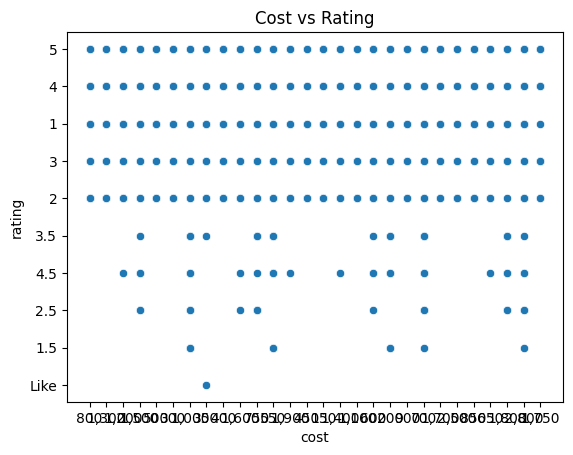

In [29]:
if "cost" in df.columns:
    sns.scatterplot(x="cost", y="rating", data=df)
    plt.title("Cost vs Rating")
    plt.show()


In [ ]:
#Sentiment Analysis

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [34]:
analyzer = SentimentIntensityAnalyzer()


In [36]:
df["sentiment_score"] = df["review"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)


In [37]:
def get_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["sentiment_score"].apply(get_sentiment)


In [39]:
df[["review", "sentiment"]].head()


,review,sentiment
0,"The ambience was good, food was quite good . h...",Positive
1,Ambience is too good for a pleasant evening. S...,Positive
2,A must try.. great food great ambience. Thnx f...,Positive
3,Soumen das and Arun was a great guy. Only beca...,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,Positive


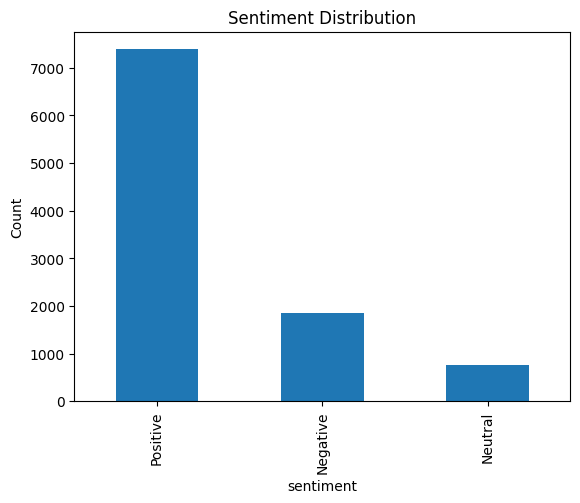

In [40]:
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.show()
